In [46]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [47]:
import numpy as np
import pandas as pd

In [48]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [49]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [50]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [51]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [52]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [56]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [57]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [198]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
rain = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2017-01-01").\
       group_by(Measurement.date).all()
rain

[('2017-01-01', 0.03),
 ('2017-01-02', 0.0),
 ('2017-01-03', 0.0),
 ('2017-01-04', 0.0),
 ('2017-01-05', 0.47),
 ('2017-01-06', 0.1),
 ('2017-01-07', 0.0),
 ('2017-01-08', 0.03),
 ('2017-01-09', 0.0),
 ('2017-01-10', 0.0),
 ('2017-01-11', 0.0),
 ('2017-01-12', 0.0),
 ('2017-01-13', 0.0),
 ('2017-01-14', 0.0),
 ('2017-01-15', 0.01),
 ('2017-01-16', 0.0),
 ('2017-01-17', 0.0),
 ('2017-01-18', 0.07),
 ('2017-01-19', 0.0),
 ('2017-01-20', 0.0),
 ('2017-01-21', 0.08),
 ('2017-01-22', 0.72),
 ('2017-01-23', 0.85),
 ('2017-01-24', 1.85),
 ('2017-01-25', 2.64),
 ('2017-01-26', 0.1),
 ('2017-01-27', 0.03),
 ('2017-01-28', 0.0),
 ('2017-01-29', 0.55),
 ('2017-01-30', 0.0),
 ('2017-01-31', 0.0),
 ('2017-02-01', 0.0),
 ('2017-02-02', 0.0),
 ('2017-02-03', 0.0),
 ('2017-02-04', None),
 ('2017-02-05', 0.0),
 ('2017-02-06', 0.0),
 ('2017-02-07', 1.79),
 ('2017-02-08', 0.0),
 ('2017-02-09', 0.0),
 ('2017-02-10', 0.0),
 ('2017-02-11', 0.73),
 ('2017-02-12', 1.83),
 ('2017-02-13', 0.0),
 ('2017-02-14', 

In [199]:
#Create a Data Frame using Pandas for the last 12 months of precipitation.

rain_df = pd.DataFrame(rain)
rain_df_=rain_df.set_index("date")
rain_df_.head()
# Sort the dataframe by date

,prcp
date,
2017-01-01,0.03
2017-01-02,0.00
2017-01-03,0.00
2017-01-04,0.00
2017-01-05,0.47


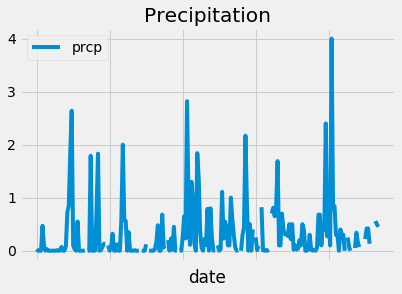

In [200]:
#Plot the precipitation over the last 12 months.

rain_df_.plot()
plt.title("Precipitation")
plt.savefig("Precipitation")
plt.show()

In [201]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_df_.describe()

,prcp
count,217.000000
mean,0.321889
std,0.553143
min,0.000000
25%,0.000000
50%,0.100000
75%,0.440000
max,4.000000


In [202]:
# Design a query to show how many stations are available in this dataset?
station_first = session.query(Station).first()
total_stations = session.query(Station.station).count()
total_stations

9

In [203]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


#Find the most active stations.

active_station = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [185]:
 # Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

#active_station_df = pd.DataFrame((active_station), columns=headers)
#active_station_df = active_station_df.set_index("station")
#active_station_df.head()

#I didn't understand this question

# Exploratory Climate Analysis

In [204]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

top_station = active_station[0][0]
tobs = session.query(Measurement.tobs).filter(Measurement.date >= "2017-01-01", Measurement.station == top_station).all()  
tobs = pd.DataFrame(tobs)
tobs.head()

,tobs
0,72.0
1,70.0
2,64.0
3,63.0
4,63.0


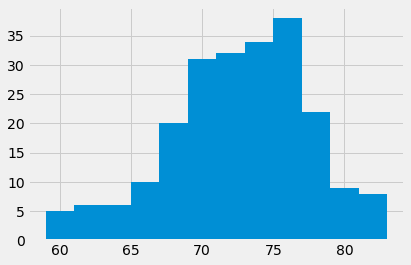

In [205]:
plt.hist(tobs["tobs"], bins=12)

plt.show()



In [206]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):

    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [114]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 

print(calc_temps('2011-02-27', '2011-03-04'))


[(61.0, 70.12244897959184, 75.0)]


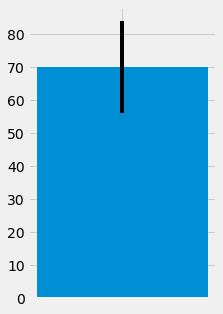

[(61.0, 70.12244897959184, 75.0)]


In [207]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

mean_temp = 70.12244897959184
max_temp = 75.0
min_temp = 61.0
plt.figure(figsize=(3,5))
plt.bar(1,mean_temp, yerr= max_temp - min_temp, tick_label="")
plt.show()
print(calc_temps('2011-02-27', '2011-03-04'))


In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
# Do not understand the question


[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment